In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
from pylibdmtx.pylibdmtx import decode
from matplotlib.patches import Rectangle
from skimage import exposure

(204, 210)
Rect(left=34, top=32, width=179, height=151)
b'818934'


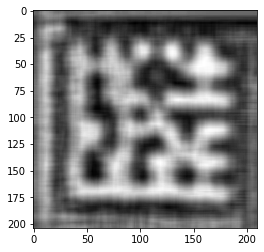

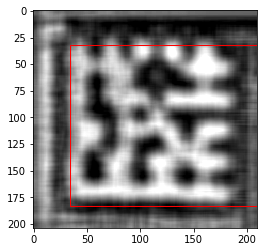

In [56]:
image = cv2.imread('C:/Users/Varun Makdani/Desktop/QR/eddy_current_2_crop.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape) # convert to HSV
figure_size_low = 7
figure_size_high = 17
gauss_image = cv2.GaussianBlur(image, (figure_size_low, figure_size_low),sigmaX = 0.1,sigmaY = 0.1)
#plt.imshow(gauss_image,cmap = "gray")
gauss_image_2 = cv2.GaussianBlur(image, (figure_size_high, figure_size_high),sigmaX = 30,sigmaY = 30)
difference = gauss_image_2 - gauss_image
difference = cv2.GaussianBlur(difference, (figure_size_high, figure_size_high),sigmaX = 15,sigmaY=15)
# difference = cv2.resize(difference,(int(100 * difference.shape[1]/difference.shape[0]),100))
#difference = cv2.resize(difference,(10,90))
#image_equalized = exposure.equalize_hist(difference)
plt.imshow(difference,cmap = "gray")
p2, p98 = np.percentile(difference, (2, 98))
img_rescale = exposure.rescale_intensity(difference, in_range=(p2, p98))
qr = decode(img_rescale)
figure, ax = plt.subplots(1)

ax.imshow(img_rescale,cmap = "gray")

if(len(qr) !=0):
    rect = Rectangle((qr[0].rect.left,qr[0].rect.top),qr[0].rect.width,qr[0].rect.height, edgecolor='r',        facecolor="none")
    ax.add_patch(rect)
    print(qr[0].rect)
    print(qr[0].data)

In [ ]:
image = cv2.imread('C:/Users/Varun Makdani/Desktop/QR/titanium_data_mat_2_filter.tif') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

qr = decode(image)
figure, ax = plt.subplots(1)

ax.imshow(image,cmap = "gray")

if(len(qr) !=0):
    rect = Rectangle((qr[0].rect.left,qr[0].rect.top),qr[0].rect.width,qr[0].rect.height, edgecolor='r',        facecolor="none")
    ax.add_patch(rect)
    print(qr[0].rect)
    print(qr[0].data)


[Decoded(data=b'65Z42', rect=Rect(left=37, top=27, width=154, height=148))]


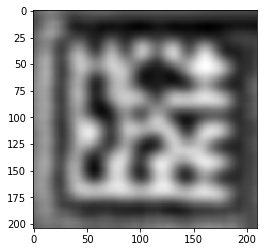

In [57]:
kernel = np.ones((17,17),np.float32)/(17*17)
#dst = cv.filter2D(img,-1,kernel)
#median_blur = cv2.medianBlur(img_rescale, 17)
median_blur = cv2.filter2D(img_rescale,-1, kernel)
plt.imshow(median_blur,cmap = "gray")
qr = decode(median_blur)
print(qr)

[]


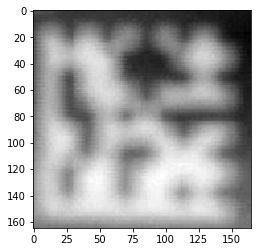

In [5]:
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = image.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift#*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

gray = (img_back/np.power(255,3))
image_equalized_low = exposure.equalize_hist(gray)
plt.imshow(img_back,cmap='gray')


qr = decode(img_back)
print(qr)


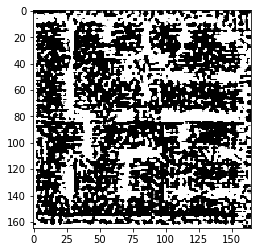

In [9]:
laplacian_image = cv2.Laplacian(image,-1,ksize=7,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
#
#eq = cv2.equalizeHist( laplacian_image+img_back)
# image_equalized_laplacian = exposure.equalize_hist( 
#  gray - laplacian_image )
image_equalized_laplacian_2 = exposure.equalize_hist(laplacian_image)
plt.imshow(laplacian_image ,cmap='gray')
# qr = decode(image_equalized_laplacian)
# print(qr)

In [ ]:
image_cool = cv2.imread('C:/Users/Varun Makdani/Desktop/QR/eddy_current_3_crop_1.tif') # reads the image
image_cool = cv2.cvtColor(image_cool, cv2.COLOR_BGR2GRAY) # convert to HSV
qr = decode(image_cool)
print(qr)